# Muhammad Irvan Hakim
# 2109106057
# Posttest 5 (Pendekatan Machine Learning)

#### Import Library pandas

In [100]:
import pandas as pd

#### Menginput File CSV Menggunakan Pandas

In [101]:
df = pd.read_csv('Wine_Quality_Dataset.csv')
df

,Unnamed: 0,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,is_red
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,5315,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
5316,5316,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
5317,5317,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
5318,5318,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


## A. Supervised Learning

## A1. Implementasikan metode Support Vector Classifier

#### Disini saya menggunakan label is_red yang merupakan label kategorikal (Klasifikasi)

#### Import library

In [102]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

#### Ambil 2 fitur untuk Binary Classification (fixed_acidity & volatile_acidity)

In [103]:
X = df[['fixed_acidity', 'volatile_acidity']]
y = df['is_red']

#### Memetakan kelas target ke Label Biner (1 (Anggur Merah) vs 0 (Bukan Anggur Merah))

In [104]:
y = np.where(y == 1, 1, -1)

#### Bagi data (split) ke train set dan test set

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [106]:
svm = SVC(kernel="linear") # Buat objek classifier (model) SVM
svm.fit(X_train, y_train) # Latih classifier (model) dengan data train

SVC(kernel='linear')

#### Lakukan prediksi data test dengan model

In [107]:
y_prediksi = svm.predict(X_test)

#### Simpan nilai Support Vectors & Indexnya

In [108]:
support_vectors = svm.support_vectors_
support_vector_indices = np.where(np.isin(X_train, support_vectors).all(axis=1))

#### Plotting menggunakan Scatter dari Seaborn

<Axes: xlabel='fixed_acidity', ylabel='volatile_acidity'>

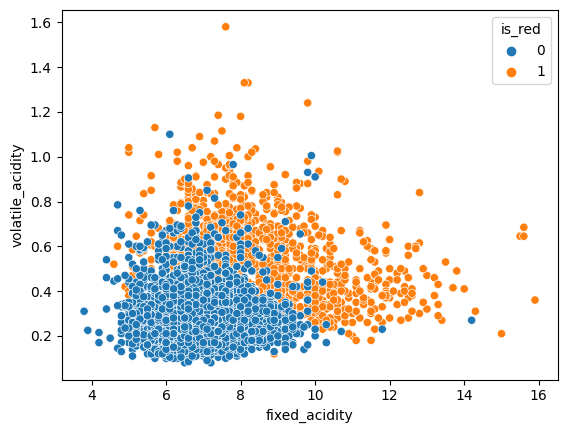

In [109]:
sns.scatterplot(x='fixed_acidity', y='volatile_acidity', hue='is_red', data=df)

#### Jalankan kodingan dibawah ini untuk membuat SVM

c:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


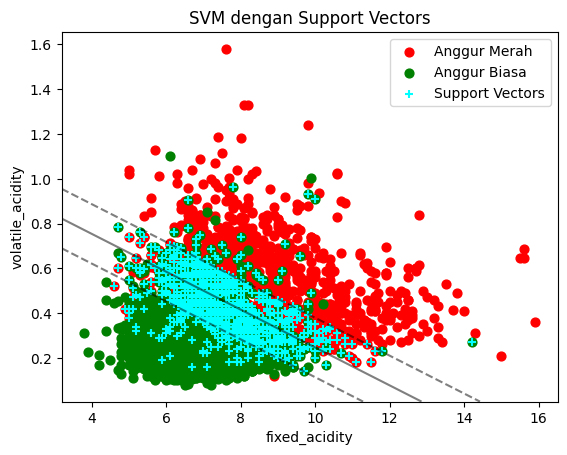

In [110]:
# Plotting menggunakan Scatter dari Matplotlib
plt.scatter(X[y == 1].iloc[:, 0], X[y == 1].iloc[:, 1], s=40, label='Anggur Merah', marker='o', color='red')
plt.scatter(X[y == -1].iloc[:, 0], X[y == -1].iloc[:, 1], s=40, label='Anggur Biasa', marker='o', color='green')

# Tampilkan Titik-Titik Support Vectors-nya
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=40, color='cyan', marker='+', label='Support Vectors')

# Buat garis Decision Boundary (Ruang Keputusan)
ax = plt.gca() # gca() = "Get Current Axes"
xlim = ax.get_xlim()
ylim = ax.get_ylim()
# Buat sebuah meshgrid untuk evaluasi model
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1]), # Linear Space x
np.linspace(ylim[0], ylim[1])) # Linear Space y
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()]) # Concatenate
Z = Z.reshape(xx.shape) # Reshape titik agar sesuai dengan sumbu x
# Buat grafik Decision Boundary dan garis Marginnya
ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# Tambahkan Label dan Legenda
plt.xlabel('fixed_acidity')
plt.ylabel('volatile_acidity')
plt.legend(loc='upper right')
plt.title('SVM dengan Support Vectors')
plt.show()

## A2. Hasil prediksi dievaluasi menggunakan Confusion Matrix & Classification Report

### Membuat confussion matrix

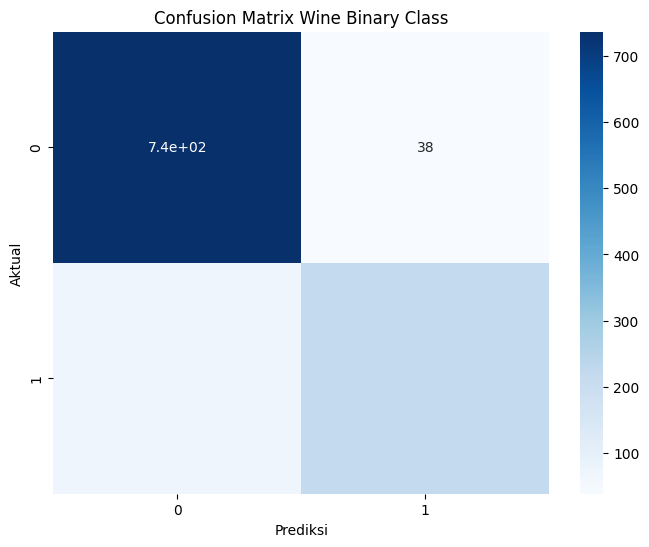

In [111]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_prediksi)

# Visualisasi Confusion Matrix dengan Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Wine Binary Class')
plt.show()

### Membuat Classification Report

#### Import Library

In [112]:
from sklearn.metrics import classification_report

In [113]:
class_report_knn = classification_report(y_test, y_prediksi)

#### Menampilkan Classification Report

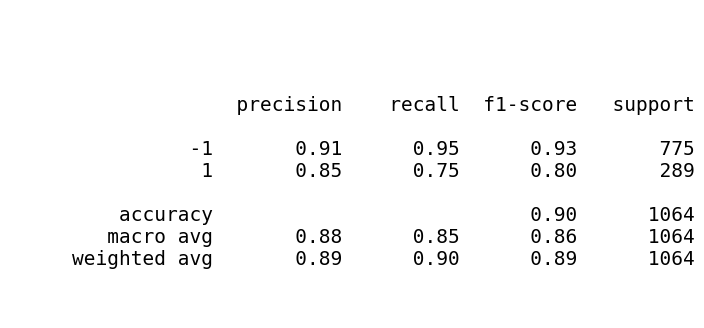

In [114]:
plt.figure(figsize=(8, 4))
plt.text(0.1, 0.1, class_report_knn, {'fontsize': 14}, fontproperties='monospace')
plt.axis('off')

plt.show()

## A3. Buat plot untuk hasil prediksi-nya

#### Konversi label kelas ke kode warna numerik

In [124]:
color_map = {-1: 'r', 1: 'g'}
y_pred_colors = [color_map[label] for label in y_prediksi]
y_test_colors = [color_map[label] for label in y_test]

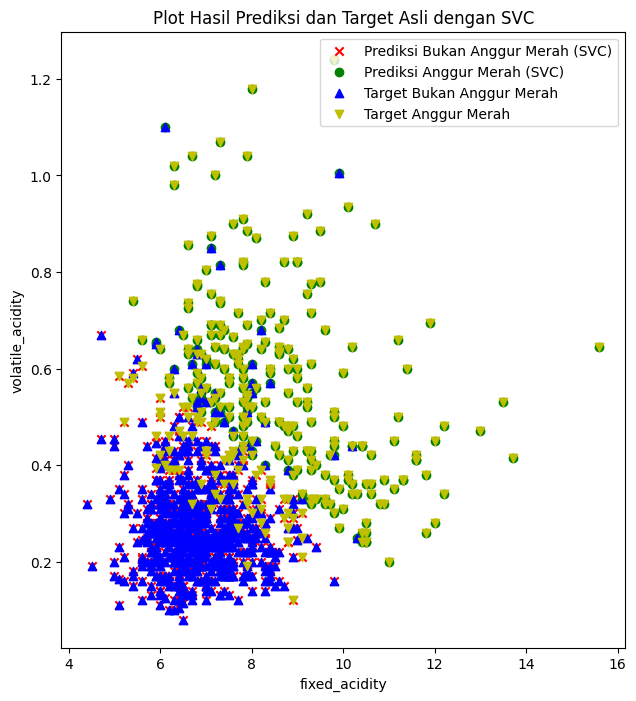

In [127]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
           
plt.scatter(X_test[y_prediksi == -1]['fixed_acidity'], X_test[y_prediksi == -1]['volatile_acidity'], c='r', marker='x', label='Prediksi Bukan Anggur Merah (SVC)')

plt.scatter(X_test[y_prediksi == 1]['fixed_acidity'], X_test[y_prediksi == 1]['volatile_acidity'], c='g', marker='o', label='Prediksi Anggur Merah (SVC)')

plt.scatter(X_test[y_test == -1]['fixed_acidity'], X_test[y_test == -1]['volatile_acidity'], c='b', marker='^', label='Target Bukan Anggur Merah')

plt.scatter(X_test[y_test == 1]['fixed_acidity'], X_test[y_test == 1]['volatile_acidity'], c='y', marker='v', label='Target Anggur Merah')

plt.xlabel('fixed_acidity')
plt.ylabel('volatile_acidity')
plt.title('Plot Hasil Prediksi dan Target Asli dengan SVC')
plt.legend(loc='best')
plt.show()

#### Penjelasan: Anggur merah memiliki fixed acidity dan volatile acidity yang lebih tinggi daripada anggur biasa

## B. Unsupervised Learning

### B1. Implementasikan metode K-Means pada dataset. Gunakan nilai K sesuai dengan jumlah target.

#### Import Library KMeans

In [130]:
from sklearn.cluster import KMeans

#### Menggunakan kolom citric_acid (kolom ke-3) dan residual_sugar (kolom ke-4)

In [128]:
X = df.iloc[:, [3, 4]].values

#### Inisialisasi list untuk menyimpan nilai WCSS tiap kelompok

In [129]:
wcss = []

#### Buat loop untuk melatih algoritma K-Means dengan berbagai jumlah kluster (K)

In [131]:
for k in range(1, 7):
    model = KMeans(n_clusters=k, n_init=10, random_state=0)
    model.fit(X)
    wcss.append(model.inertia_)

#### Buat grafik Elbow Method

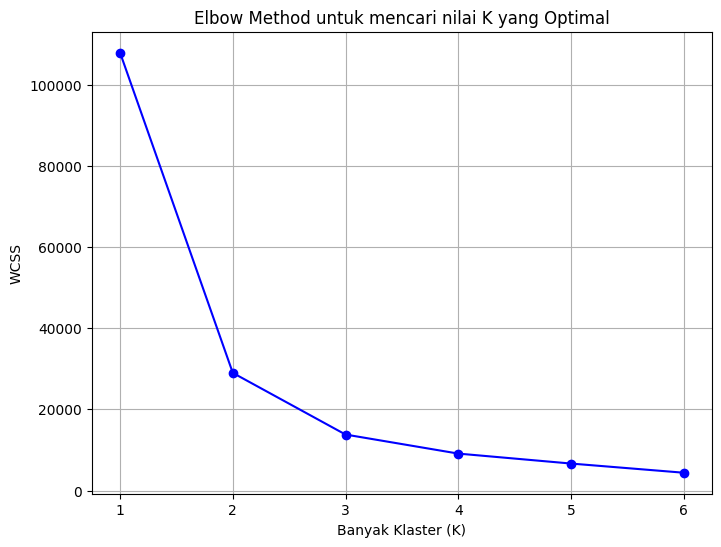

In [132]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 7), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method untuk mencari nilai K yang Optimal')
plt.xlabel('Banyak Klaster (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

#### Inisialisasi model K-Means dengan nilai K yang sesuai

In [133]:
k = 3 
kmeans = KMeans(k, n_init=10)

#### Pilih hanya kolom citric_acid dan residual_sugar sebagai fitur X.

In [134]:
X = df[["citric_acid", "residual_sugar"]]

#### Fit model K-Means pada dataset

In [135]:
kmeans.fit(X)

KMeans(n_clusters=3, n_init=10)

#### Prediksi cluster untuk setiap data point dalam dataset

In [136]:
predicted_clusters = kmeans.predict(X)

#### Tambahkan kolom "cluster" ke dataset

In [137]:
df["cluster"] = predicted_clusters

### B2. Cluster yang telah diprediksi harus dievaluasi

#### - Unlabeled Dataset (Dataset Tanpa Label)

#### Import Library

In [138]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

#### X adalah dataset yang telah di-cluster dengan K-Means. predicted_clusters adalah hasil clustering yang telah diprediksi


In [139]:
ss_score = silhouette_score(X, predicted_clusters)
print(f"Silhouette Score: {ss_score:.2f}")
db_index = davies_bouldin_score(X, predicted_clusters)
print(f"Davies-Bouldin Index: {db_index:.2f}")
ch_index = calinski_harabasz_score(X, predicted_clusters)
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Silhouette Score: 0.69
Davies-Bouldin Index: 0.49
Calinski-Harabasz Index: 18129.23


#### - Labeled Dataset (Dataset Dengan Label)

#### Import Library

In [142]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, homogeneity_score, completeness_score, v_measure_score

#### true_labels adalah kolom yang berisi label asli dataset

In [140]:
true_labels = df['is_red']

#### Menggantilah dengan nama dataset yang sesuai dan predicted_clusters yang sesuai

In [141]:
cross_tab = pd.crosstab(predicted_clusters, true_labels)
print("Cross-Tabulation:")
print(cross_tab, "\n")

Cross-Tabulation:
is_red     0     1
row_0             
0       1243    60
1       2024  1292
2        694     7 



#### Adjusted Rand Index (ARI)

In [143]:
ari = adjusted_rand_score(true_labels, predicted_clusters)
print(f"Adjusted Rand Index (ARI): {ari:.2f}")

Adjusted Rand Index (ARI): -0.05


#### Normalized Mutual Information (NMI)

In [144]:
nmi_citric_acid = normalized_mutual_info_score(df['citric_acid'], predicted_clusters)
nmi_residual_sugar = normalized_mutual_info_score(df['residual_sugar'], predicted_clusters)

print(f"Normalized Mutual Information (NMI) nmi_citric_acid: {nmi_citric_acid:.2f}")
print(f"Normalized Mutual Information (NMI) residual_sugar: {nmi_residual_sugar:.2f}")

Normalized Mutual Information (NMI) nmi_citric_acid: 0.02
Normalized Mutual Information (NMI) residual_sugar: 0.32


c:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
c:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


#### Fungsi HCV-M

In [145]:
homogeneity = homogeneity_score(true_labels, predicted_clusters)
completeness = completeness_score(true_labels, predicted_clusters)
v_measure = v_measure_score(true_labels, predicted_clusters)

print(f"Homogeneity Score: {homogeneity:.2f}")
print(f"Completeness Score: {completeness:.2f}")
print(f"V-Measure Score: {v_measure:.2f}")

Homogeneity Score: 0.17
Completeness Score: 0.11
V-Measure Score: 0.13
